**Importing the libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**Importing the dataset**

In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [4]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [5]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

**Vectorizing the dataset**

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [7]:
x_train = vectorize_sequences(train_data)
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Berikut ini akan dilakukan beberapa percobaan untuk melihat dampak perubahan parameter ANN terhadap nilai loss, accuracy, validation loss, dan validation accuracy.

<table>
  <tr align="center">
    <th>Percobaan</th>
    <th>Jumlah Epoch</th>
    <th>Jumlah Hidden Layer</th>
    <th>Jumlah Unit per Hidden Layer</th>
    <th>Loss Function</th>
    <th>Activation Function</th>
    <th>Loss</th>
    <th>Accuracy</th>
    <th>Val_Loss</th>
    <th>Val_Accuracy</th>
  </tr>
  <tr align="center">
    <td>1</td>
    <td>20</td>
    <td>2</td>
    <td>16</td>
    <td>binary_crossentropy</td>
    <td>sigmoid</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
  </tr>
  <tr align="center">
    <td>2</td>
    <td>20</td>
    <td>1</td>
    <td>16</td>
    <td>binary_crossentropy</td>
    <td>sigmoid</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
  </tr>
  <tr align="center">
    <td>3</td>
    <td>20</td>
    <td>3</td>
    <td>16</td>
    <td>binary_crossentropy</td>
    <td>sigmoid</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
  </tr>
  <tr align="center">
    <td>4</td>
    <td>20</td>
    <td>2</td>
    <td>32</td>
    <td>binary_crossentropy</td>
    <td>sigmoid</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
  </tr>
  <tr align="center">
    <td>5</td>
    <td>20</td>
    <td>2</td>
    <td>64</td>
    <td>binary_crossentropy</td>
    <td>sigmoid</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
  </tr>
  <tr align="center">
    <td>6</td>
    <td>20</td>
    <td>2</td>
    <td>16</td>
    <td>mse</td>
    <td>sigmoid</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
  </tr>
  <tr align="center">
    <td>7</td>
    <td>20</td>
    <td>2</td>
    <td>16</td>
    <td>binary_crossentropy</td>
    <td>tanh</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
    <td>-</td>
  </tr>



# Percobaan 1

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
history_1 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 75ms/step - loss: 0.5940 - accuracy: 0.7001 - val_loss: 0.3944 - val_accuracy: 0.8574
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3304 - accuracy: 0.8979 - val_loss: 0.3109 - val_accuracy: 0.8850
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2336 - accuracy: 0.9291 - val_loss: 0.2828 - val_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1859 - accuracy: 0.9424 - val_loss: 0.2782 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1485 - accuracy: 0.9551 - val_loss: 0.2846 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1234 - accuracy: 0.9651 - val_loss: 0.2894 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1002 - accuracy: 0.9736 - val_loss: 0.3039 - val_accuracy: 0.8846
Epoch 8/20
30

# Percobaan 2

In [14]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
history_2 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 62ms/step - loss: 0.5934 - accuracy: 0.7325 - val_loss: 0.4139 - val_accuracy: 0.8642
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3551 - accuracy: 0.9022 - val_loss: 0.3333 - val_accuracy: 0.8827
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2697 - accuracy: 0.9226 - val_loss: 0.3040 - val_accuracy: 0.8847
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2202 - accuracy: 0.9365 - val_loss: 0.2915 - val_accuracy: 0.8844
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1871 - accuracy: 0.9442 - val_loss: 0.2763 - val_accuracy: 0.8898
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1566 - accuracy: 0.9559 - val_loss: 0.2784 - val_accuracy: 0.8890
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1392 - accuracy: 0.9599 - val_loss: 0.2864 - val_accuracy: 0.8827
Epoch 8/20
30

# Percobaan 3

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
history_3 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.6528 - accuracy: 0.6605 - val_loss: 0.4643 - val_accuracy: 0.8478
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3918 - accuracy: 0.8865 - val_loss: 0.3235 - val_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2572 - accuracy: 0.9217 - val_loss: 0.2996 - val_accuracy: 0.8804
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1865 - accuracy: 0.9394 - val_loss: 0.2711 - val_accuracy: 0.8903
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1506 - accuracy: 0.9545 - val_loss: 0.2905 - val_accuracy: 0.8825
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1238 - accuracy: 0.9626 - val_loss: 0.3162 - val_accuracy: 0.8778
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1001 - accuracy: 0.9683 - val_loss: 0.3201 - val_accuracy: 0.8820
Epoch 8/20
30

# Percobaan 4

In [20]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
history_4 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.5598 - accuracy: 0.7335 - val_loss: 0.3462 - val_accuracy: 0.8789
Epoch 2/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2842 - accuracy: 0.9044 - val_loss: 0.2897 - val_accuracy: 0.8851
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1974 - accuracy: 0.9337 - val_loss: 0.2886 - val_accuracy: 0.8815
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1482 - accuracy: 0.9535 - val_loss: 0.2827 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1161 - accuracy: 0.9632 - val_loss: 0.3038 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 1s 48ms/step - loss: 0.0901 - accuracy: 0.9729 - val_loss: 0.3217 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0739 - accuracy: 0.9799 - val_loss: 0.3423 - val_accuracy: 0.8819
Epoch 8/20
30

# Percobaan 5

In [23]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
history_5 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.5702 - accuracy: 0.6778 - val_loss: 0.4481 - val_accuracy: 0.7965
Epoch 2/20
30/30 [==============================] - 2s 57ms/step - loss: 0.2824 - accuracy: 0.8913 - val_loss: 0.3060 - val_accuracy: 0.8766
Epoch 3/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1979 - accuracy: 0.9251 - val_loss: 0.2892 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1454 - accuracy: 0.9474 - val_loss: 0.2967 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0979 - accuracy: 0.9706 - val_loss: 0.4409 - val_accuracy: 0.8478
Epoch 6/20
30/30 [==============================] - 2s 61ms/step - loss: 0.0873 - accuracy: 0.9715 - val_loss: 0.3469 - val_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 2s 61ms/step - loss: 0.0504 - accuracy: 0.9868 - val_loss: 0.3830 - val_accuracy: 0.8790
Epoch 8/20
30

# Percobaan 6

In [26]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])

In [28]:
history_6 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.1990 - accuracy: 0.7021 - val_loss: 0.1130 - val_accuracy: 0.8700
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0917 - accuracy: 0.8986 - val_loss: 0.0989 - val_accuracy: 0.8728
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0664 - accuracy: 0.9282 - val_loss: 0.0933 - val_accuracy: 0.8769
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0495 - accuracy: 0.9467 - val_loss: 0.0950 - val_accuracy: 0.8710
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0420 - accuracy: 0.9564 - val_loss: 0.0921 - val_accuracy: 0.8761
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0314 - accuracy: 0.9703 - val_loss: 0.0937 - val_accuracy: 0.8733
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0258 - accuracy: 0.9771 - val_loss: 0.0862 - val_accuracy: 0.8822
Epoch 8/20
30

# Percobaan 7

In [31]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))

In [32]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
history_7 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 1.3993 - accuracy: 0.5814 - val_loss: 0.4186 - val_accuracy: 0.8341
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3563 - accuracy: 0.8803 - val_loss: 0.3621 - val_accuracy: 0.8736
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2603 - accuracy: 0.9232 - val_loss: 0.4207 - val_accuracy: 0.8841
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2037 - accuracy: 0.9369 - val_loss: 0.5867 - val_accuracy: 0.8790
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1668 - accuracy: 0.9612 - val_loss: 0.4593 - val_accuracy: 0.8824
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1282 - accuracy: 0.9699 - val_loss: 0.7289 - val_accuracy: 0.8744
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1121 - accuracy: 0.9787 - val_loss: 0.8009 - val_accuracy: 0.8737
Epoch 8/20
30

# Analisa

## Comparing the Training and Validation Loss Visualization

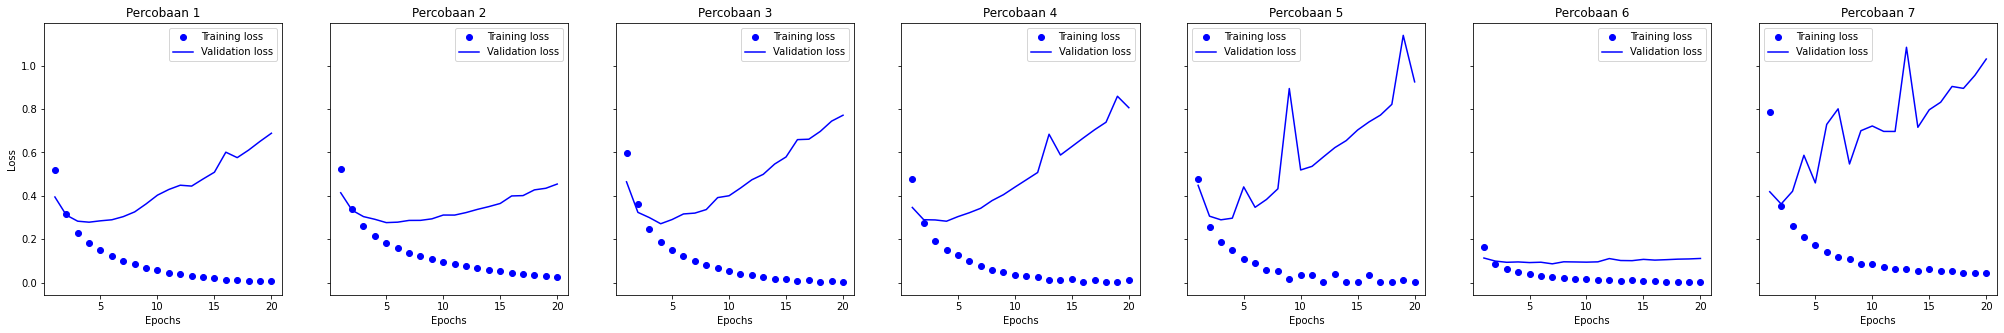

In [49]:
fig, axes = plt.subplots(ncols=7, figsize=(35,5), sharey=True)

plt.sca(axes[0])
history_dict = history_1.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Percobaan 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.sca(axes[1])
history_dict = history_2.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Percobaan 2')
plt.xlabel('Epochs')
plt.legend()

plt.sca(axes[2])
history_dict = history_3.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Percobaan 3')
plt.xlabel('Epochs')
plt.legend()

plt.sca(axes[3])
history_dict = history_4.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Percobaan 4')
plt.xlabel('Epochs')
plt.legend()

plt.sca(axes[4])
history_dict = history_5.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Percobaan 5')
plt.xlabel('Epochs')
plt.legend()

plt.sca(axes[5])
history_dict = history_6.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Percobaan 6')
plt.xlabel('Epochs')
plt.legend()

plt.sca(axes[6])
history_dict = history_7.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Percobaan 7')
plt.xlabel('Epochs')
plt.legend()

Pada grafik di atas dapat dilihat bahwa perbedaan kurva validation loss lebih mencolok daripada training loss. Terdapat model yang memiliki laju pertambahan validation loss sangat tinggi dan sangat rendah.

## Comparing the Training and Validation Accuracy Visualization

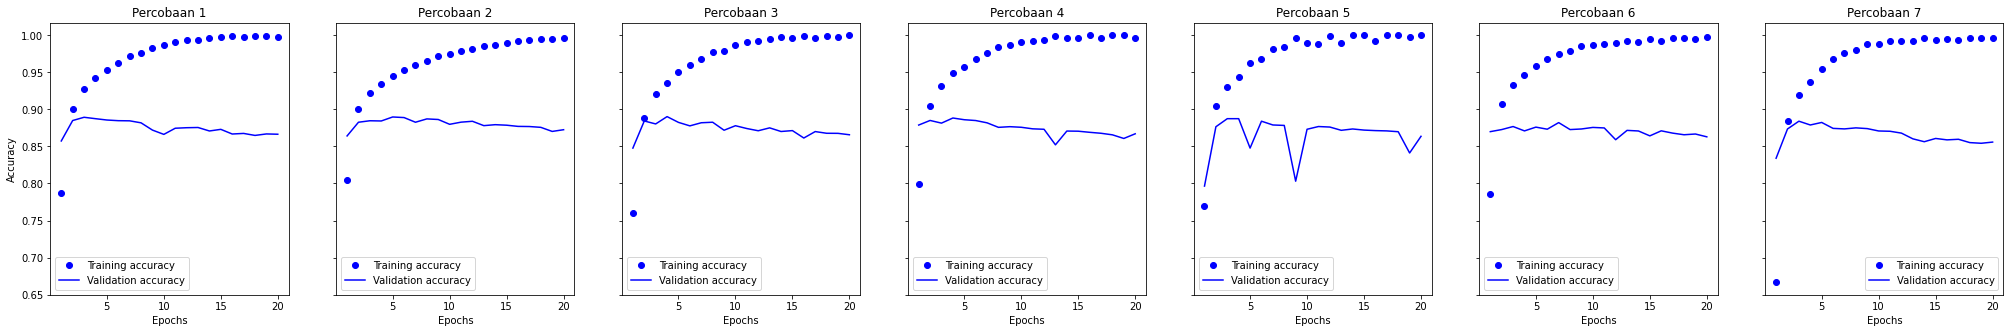

In [48]:
fig, axes = plt.subplots(ncols=7, figsize=(35,5), sharey=True)

plt.sca(axes[0])
history_dict = history_1.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Percobaan 1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.sca(axes[1])
history_dict = history_2.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Percobaan 2')
plt.xlabel('Epochs')
plt.legend()

plt.sca(axes[2])
history_dict = history_3.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Percobaan 3')
plt.xlabel('Epochs')
plt.legend()

plt.sca(axes[3])
history_dict = history_4.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Percobaan 4')
plt.xlabel('Epochs')
plt.legend()

plt.sca(axes[4])
history_dict = history_5.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Percobaan 5')
plt.xlabel('Epochs')
plt.legend()

plt.sca(axes[5])
history_dict = history_6.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Percobaan 6')
plt.xlabel('Epochs')
plt.legend()

plt.sca(axes[6])
history_dict = history_7.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Percobaan 7')
plt.xlabel('Epochs')
plt.legend()

Berbeda dengan grafik loss, grafik accuracy di atas tidak terlalu jauh perbedaannya satu dengan yang lainnya. Adapun perbedaannya yang tidak terlalu mencolok hanya pada osilasinya.

<table>
  <tr align="center">
    <th>Percobaan</th>
    <th>Jumlah Epoch</th>
    <th>Jumlah Hidden Layer</th>
    <th>Jumlah Unit per Hidden Layer</th>
    <th>Loss Function</th>
    <th>Activation Function</th>
    <th>Loss</th>
    <th>Accuracy</th>
    <th>Val_Loss</th>
    <th>Val_Accuracy</th>
  </tr>
  <tr align="center">
    <td>1</td>
    <td>20</td>
    <td>2</td>
    <td>16</td>
    <td>binary_crossentropy</td>
    <td>sigmoid</td>
    <td>0.0046</td>
    <td>0.9994</td>
    <td>0.6883</td>
    <td>0.8665</td>
  </tr>
  <tr align="center">
    <td>2</td>
    <td>20</td>
    <td>1</td>
    <td>16</td>
    <td>binary_crossentropy</td>
    <td>sigmoid</td>
    <td>0.0252</td>
    <td>0.9966</td>
    <td>0.4541</td>
    <td>0.8726</td>
  </tr>
  <tr align="center">
    <td>3</td>
    <td>20</td>
    <td>3</td>
    <td>16</td>
    <td>binary_crossentropy</td>
    <td>sigmoid</td>
    <td>0.0015</td>
    <td>0.9999</td>
    <td>0.7713</td>
    <td>0.8658</td>
  </tr>
  <tr align="center">
    <td>4</td>
    <td>20</td>
    <td>2</td>
    <td>32</td>
    <td>binary_crossentropy</td>
    <td>sigmoid</td>
    <td>0.0214</td>
    <td>0.9935</td>
    <td>0.8061</td>
    <td>0.8671</td>
  </tr>
  <tr align="center">
    <td>5</td>
    <td>20</td>
    <td>2</td>
    <td>64</td>
    <td>binary_crossentropy</td>
    <td>sigmoid</td>
    <td>0.0020</td>
    <td>0.9997</td>
    <td>0.9252</td>
    <td>0.8637</td>
  </tr>
  <tr align="center">
    <td>6</td>
    <td>20</td>
    <td>2</td>
    <td>16</td>
    <td>mse</td>
    <td>sigmoid</td>
    <td>0.0032</td>
    <td>0.9973</td>
    <td>0.1110</td>
    <td>0.8630</td>
  </tr>
  <tr align="center">
    <td>7</td>
    <td>20</td>
    <td>2</td>
    <td>16</td>
    <td>binary_crossentropy</td>
    <td>tanh</td>
    <td>0.0438</td>
    <td>0.9966</td>
    <td>1.0304</td>
    <td>0.8559</td>
  </tr>



1. Jika jumlah hidden layer dikurangi, maka selisih loss dan validation loss semakin berkurang. 
2. Jika jumlah hidden layer ditambah, maka selisih loss dan validaton loss semakin bertambah (semakin overfitting).
3. Jika jumlah unit per hidden layer ditambah, maka selisih loss dan validation loss semakin bertambah (semakin overfitting).
4. Jika loss function diganti menjadi mse, maka selisih loss dan validation loss akan menurun drastis.
5. Jika activation function diganti menjadi tanh, maka selisih loss dan validation loss akan meningkat drastis. 

# Kesimpulan

1. Penambahan hidden layer akan membuat model semakin fit dengan data latih. Jika kita terlalu banyak menetapkan jumlah hidden layer, maka model yang kita buat akan menjadi overfitting.
2. Penambahan jumlah unit per hidden layer akan membuat model semakin fit dengan data latih. Jika kita terlalu banyak menetapkan jumlah unit per hidden layer, maka model yang kita buat akan menjadi overfitting.
3. Loss Function dan Activation Function sangat mempengaruhi model yang kita buat. Seperti yang dapat kita lihat dalam percobaan tadi, ketika loss function diganti, model yang kita buat berubah drastis.
